# Notebook: Analyse descriptives du dataset Hotel Reservations
## Import des données

In [46]:
import numpy as np
import pandas as pd
import scipy.stats as stats

data = pd.read_csv("Hotel Reservations.csv")
data = data.convert_dtypes()
data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

Vérifions les types de nos colonnes

In [47]:
data.dtypes

Booking_ID                               string
no_of_adults                              Int64
no_of_children                            Int64
no_of_weekend_nights                      Int64
no_of_week_nights                         Int64
type_of_meal_plan                        string
required_car_parking_space                Int64
room_type_reserved                       string
lead_time                                 Int64
arrival_year                              Int64
arrival_month                             Int64
arrival_date                              Int64
market_segment_type                      string
repeated_guest                            Int64
no_of_previous_cancellations              Int64
no_of_previous_bookings_not_canceled      Int64
avg_price_per_room                      float64
no_of_special_requests                    Int64
booking_status                           string
dtype: object

On garde une trace des types de variables

In [48]:
continuous = ['lead_time', 'avg_price_per_room']

categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 
               'repeated_guest', 'required_car_parking_space']

discrete = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'arrival_year', 'arrival_month', 
            'arrival_date', 'no_of_previous_cancellations',
            'no_of_previous_bookings_not_canceled',
            'no_of_special_requests']

On supprime `booking_id` qui ne nous intéresse pas, et on donne le type `pd.Categorical` aux variables catégoriques.

In [49]:
data.drop("Booking_ID", inplace=True, axis=1)

for column in ["booking_status"] + categorical:
    data[column] = data[column].astype("category")

data.dtypes

no_of_adults                               Int64
no_of_children                             Int64
no_of_weekend_nights                       Int64
no_of_week_nights                          Int64
type_of_meal_plan                       category
required_car_parking_space              category
room_type_reserved                      category
lead_time                                  Int64
arrival_year                               Int64
arrival_month                              Int64
arrival_date                               Int64
market_segment_type                     category
repeated_guest                          category
no_of_previous_cancellations               Int64
no_of_previous_bookings_not_canceled       Int64
avg_price_per_room                       float64
no_of_special_requests                     Int64
booking_status                          category
dtype: object

Le but ultimement est de prédire le label `booking status`.


Créons une dataframe avec les variables catégoriques sous forme de dummies

In [50]:
data_dummies_only = pd.get_dummies(data[["booking_status"] + categorical], drop_first=True)

data_dummies_only

booking_status_Not_Canceled  type_of_meal_plan_Meal Plan 2  \
0                                1                              0   
1                                1                              0   
2                                0                              0   
3                                0                              0   
4                                0                              0   
...                            ...                            ...   
36270                            1                              0   
36271                            0                              0   
36272                            1                              0   
36273                            0                              0   
36274                            1                              0   

       type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                                  0                               0   
1                                  0                               1   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   
...                              ...                             ...   
36270                              0                               0   
36271                              0                               0   
36272                              0                               0   
36273                              0                               1   
36274                              0                               0   

       room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
36270                               0                               0   
36271                               0                               0   
36272                               0                               0   
36273                               0                               0   
36274                               0                               0   

       room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
36270                               1                               0   
36271                               0                               0   
36272                               0                               0   
36273                               0                               0   
36274                               0                               0   

       room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   
...                               ...                             ...   
36270                               0           


## Statistiques descriptives

In [51]:
data.shape

(36275, 18)

In [52]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

          lead_time  arrival_year  arrival_month  arrival_date  \
count  36275.000000  36275.000000   36275.000000  36275.000000   
mean      85.232557   2017.820427       7.423653     15.596995   
std       85.930817      0.383836       3.069894      8.740447   
min        0.000000   2017.000000       1.000000      1.000000   
25%       17.000000   2018.000000       5.000000      8.000000   
50%       57.000000   2018.000000       8.000000     16.000000   
75%      126.000000   2018.000000      10.000000     23.000000   
max      443.000000   2018.000000      12.000000     31.000000   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                  36275.000000                          36275.000000   
mean                       0.023349                              0.153411   
std                        0.368331                              1.754171   
min                        0.000000                              0.000000   
25%                        0.000000                              0.000000   
50%                        0.000000                              0.000000   
75%                        0.000000                              0.000000   
max                       13.000000                             58.000000   

       avg_price_per_room  no_of_special_requests  
count        36275.000000            36275.000000  
mean           103.423539                0.619655  
std             35.089424                0.786236  
min              0.000000                0.000000  
25%             80.300000                0.000000  
50%             99.450000                0.000000  
75%            120.000000                1.000000  
max            540.000000                5.000000

Il y a donc 36275 individus, 18 colonnes dont 17 prédictives.

Le jeu de données représente des réservations d'hotel. On a des données temporelles sur la date d'arrivé, on a des informations sur le nombre d'adultes et enfants, le nombre de nuits passées, lesquelles sont le weekend ou la semaine, combien de jours en avance la réservation a été faite, si le client est un habitué ou non, leur nombre d'annulations passées et leur nombre de séjours (non annulé) passés, le prix moyen de la chambre, et le nombre de demandes personnalisées faites pendant la réservation.

Regardons la proportion d'annulés et non annulés pour avoir une idée du déséquilibre de notre dataset pour la variable qu'on souhaite prédire.

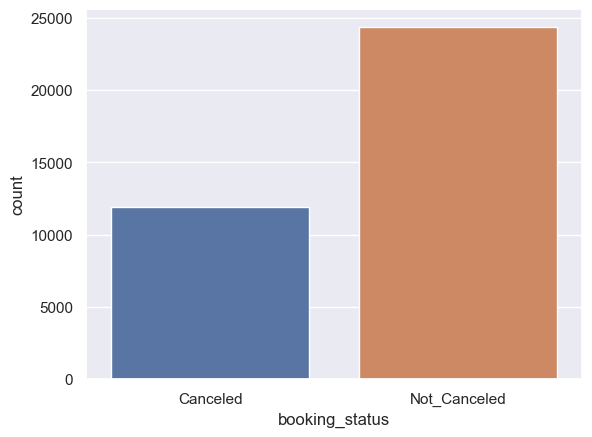

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.countplot(data, x="booking_status");

In [54]:
label_proportions = data["booking_status"].value_counts()/data.shape[0]
label_proportions

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

Il y a 67.2% de non annulé contre 32.8% d'annulés, un déséquilibre significatif en faveur des non annulés.

## Distributions par rapport à l'état de réservation

### Barplots avec barres d'erreur

Voyons les moyennes de nos variables selon la valeur de notre label (mis à part les variables temporelles)

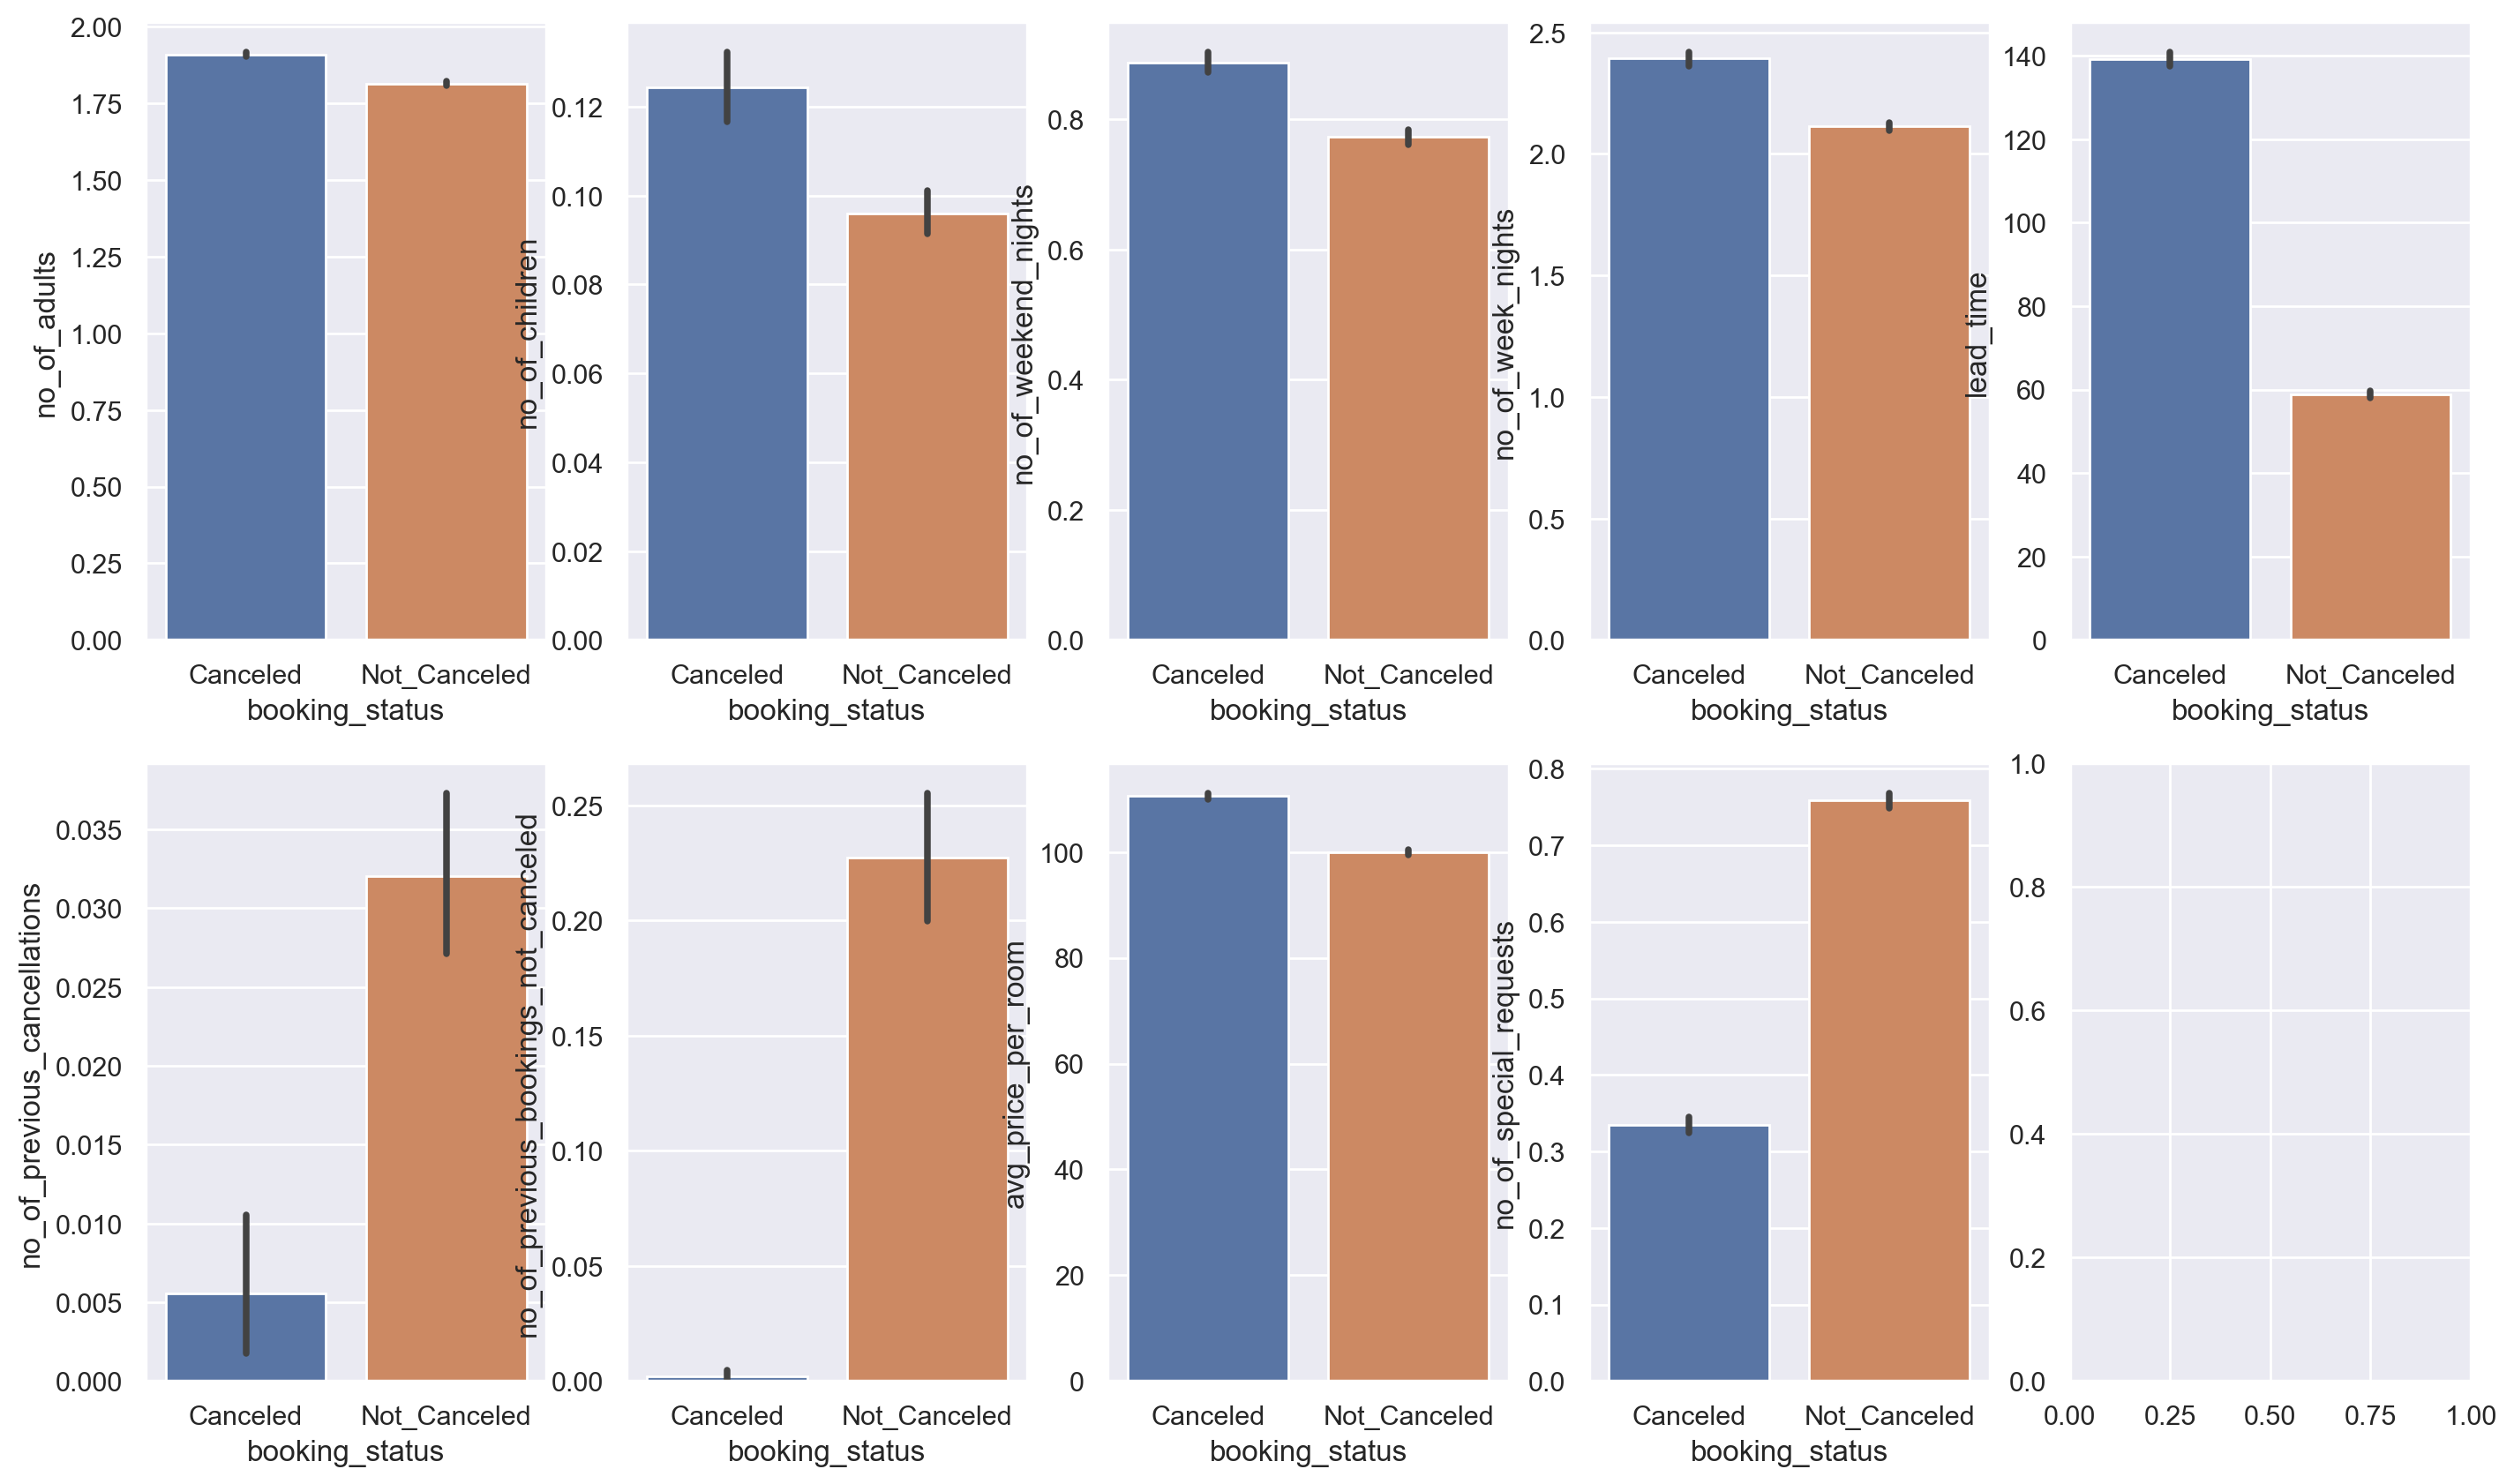

In [55]:
numeric_columns = data.select_dtypes(["int64", "float64"]).drop(["arrival_year", "arrival_month", "arrival_date"], axis=1).columns

nrows = 2

fig, ax = plt.subplots(ncols=5, nrows=nrows)
fig.dpi = 200
fig.set_size_inches(17, 5 * nrows)


for k, column in enumerate(numeric_columns):
    i = k//5
    j = k%5

    sns.barplot(data, x="booking_status", y=column, ax=ax[i, j])

### T-tests

In [56]:
for feature in continuous + discrete:
    print(f"t-test {feature} ~ booking_status :")
    group_A = data[data["booking_status"] == 'Not_Canceled'][feature]
    group_B = data[data["booking_status"] == 'Canceled'][feature]

    t_test_results = stats.ttest_ind(group_A, group_B, alternative="two-sided", equal_var=False)

    print(f"\t t-stat = {t_test_results.statistic}\n\t pvalue = {t_test_results.pvalue}")

t-test lead_time ~ booking_status :
	 t-stat = -80.61660158477908
	 pvalue = 0.0
t-test avg_price_per_room ~ booking_status :
	 t-stat = -28.450801744693095
	 pvalue = 2.3570548204656775e-175
t-test no_of_adults ~ booking_status :
	 t-stat = -17.128164318617074
	 pvalue = 2.125195840441585e-65
t-test no_of_children ~ booking_status :
	 t-stat = -6.002548649706087
	 pvalue = 1.974602153156375e-09
t-test no_of_weekend_nights ~ booking_status :
	 t-stat = -11.40433140262509
	 pvalue = 4.838631407828078e-30
t-test no_of_week_nights ~ booking_status :
	 t-stat = -16.672340896211093
	 pvalue = 5.450111353325143e-62
t-test arrival_year ~ booking_status :
	 t-stat = -40.01255249944005
	 pvalue = 0.0
t-test arrival_month ~ booking_status :
	 t-stat = 2.29257370425864
	 pvalue = 0.021879873347926276
t-test arrival_date ~ booking_status :
	 t-stat = -2.0192633905647583
	 pvalue = 0.04347122759365873
t-test no_of_previous_cancellations ~ booking_status :
	 t-stat = 7.63452079565433
	 pvalue = 2.32

Tous les t-test sont significatifs pour un seuil de 5%. Mais on vois que d'autres sont beaucoup plus significatifs.

Attention, même si toutes les différences de moyenne des distributions sont significatives, beaucoup d'entre elles ne sont pas utiles car elles sont des variables discrète prenant un ensemble de valeur trop petit

### Réservations par modalité, séparées par booking_status

#### Nombre de réservations (distributions)

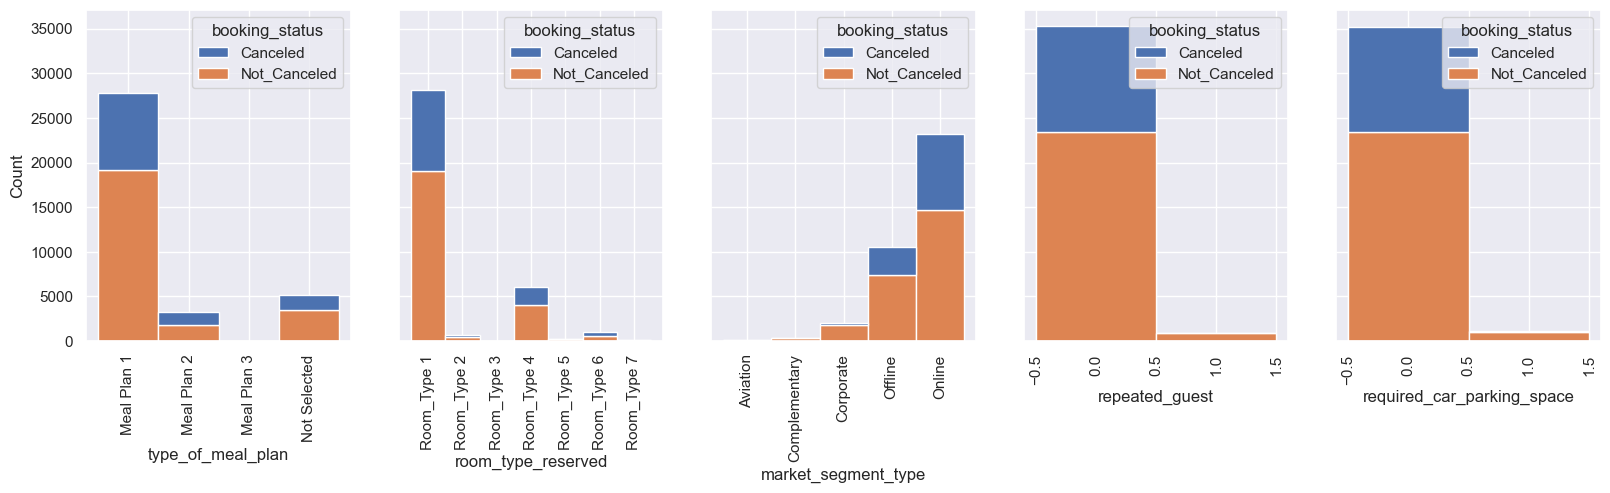

In [57]:
fig, ax = plt.subplots(1, len(categorical), figsize=(16, 4), sharey=True)
fig.tight_layout()

for i, feature_name in enumerate(categorical):
    chart = sns.histplot(data=data, x=feature_name, hue='booking_status', 
                         ax=ax[i], discrete=True, stat='count', alpha=1., 
                         multiple='stack')
    plt.setp(chart.get_xticklabels(), rotation = 90)

#### Proportions d'annulations par catégorie

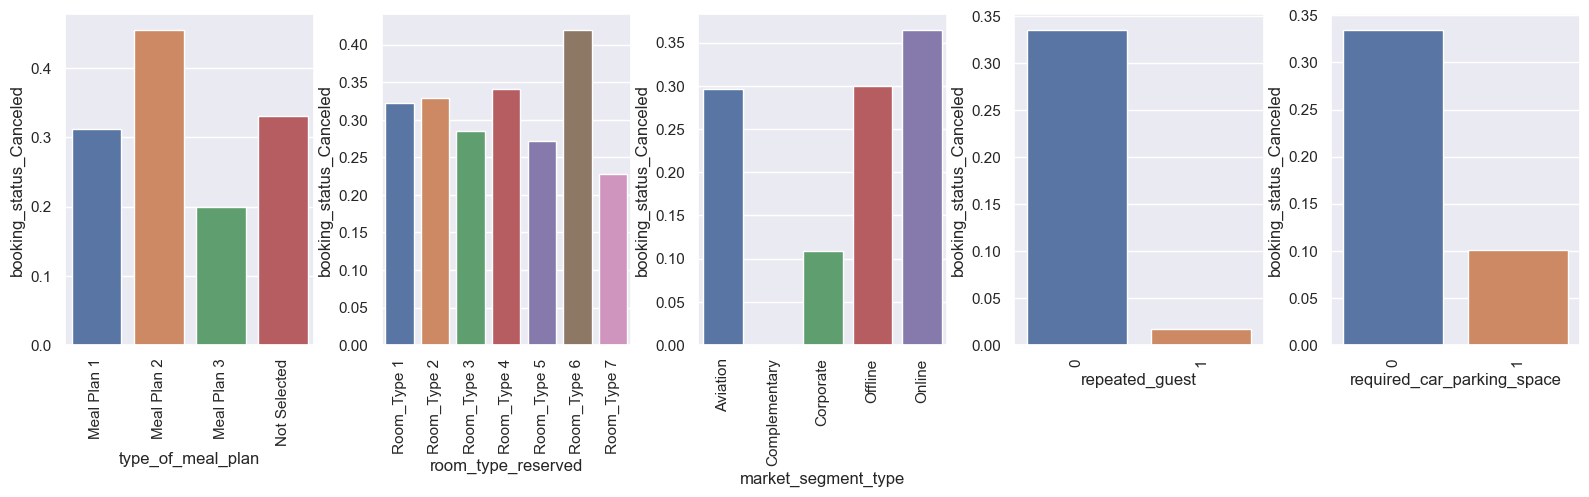

In [58]:
fig, ax = plt.subplots(1, len(categorical), figsize=(16, 4), sharey=False)
fig.tight_layout()

for i, feature_name in enumerate(categorical):
    temp_data = pd.get_dummies(data, columns=["booking_status"])
    canceled_average = temp_data.groupby([feature_name])["booking_status_Canceled"].mean().reset_index()

    canceled_average["booking_status_Canceled"]

    chart = sns.barplot(data = canceled_average, x=feature_name, y="booking_status_Canceled", ax=ax[i])
    
    plt.setp(chart.get_xticklabels(), rotation = 90)


### Nombre de réservations par valeur des variables discrètes, séparées par booking_status

#### Nombre de réservations (distributions)

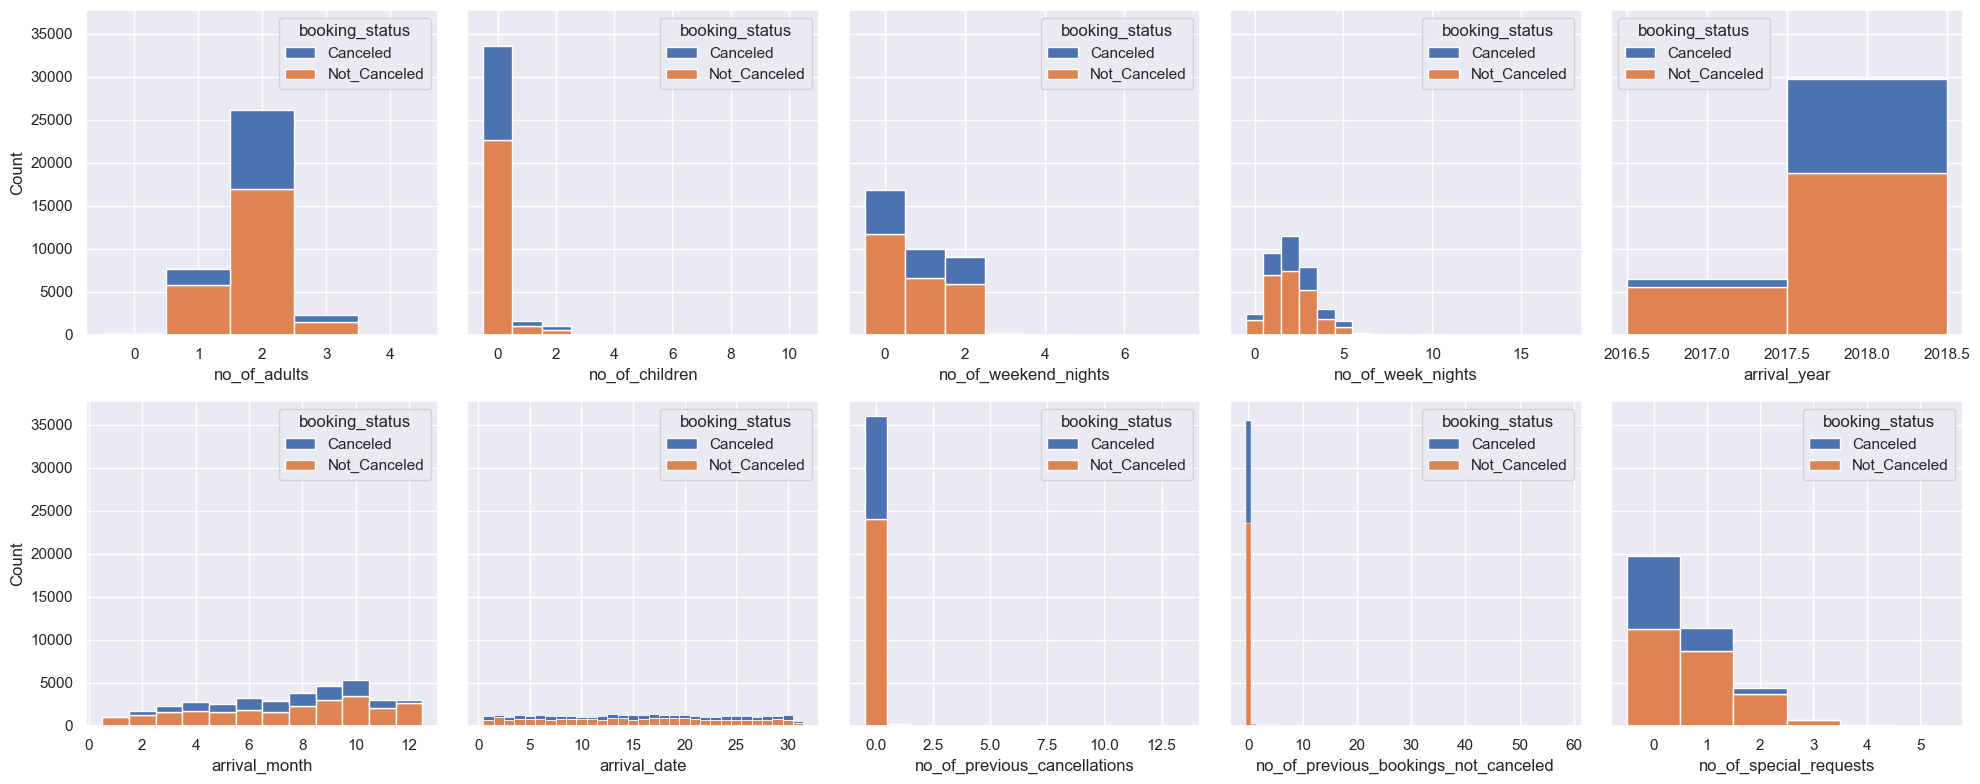

In [59]:
fig, ax = plt.subplots(2, len(discrete)//2, figsize=(20, 8), sharey=True)
ax = ax.flatten()

for i, label in enumerate(discrete):
    sns.histplot(data=data, x=label, hue='booking_status', ax=ax[i], 
                 discrete=True, stat='count', alpha=1., multiple='stack', 
                 binwidth=1)

fig.tight_layout()

#### Proportions d'annulation par valeur discrète

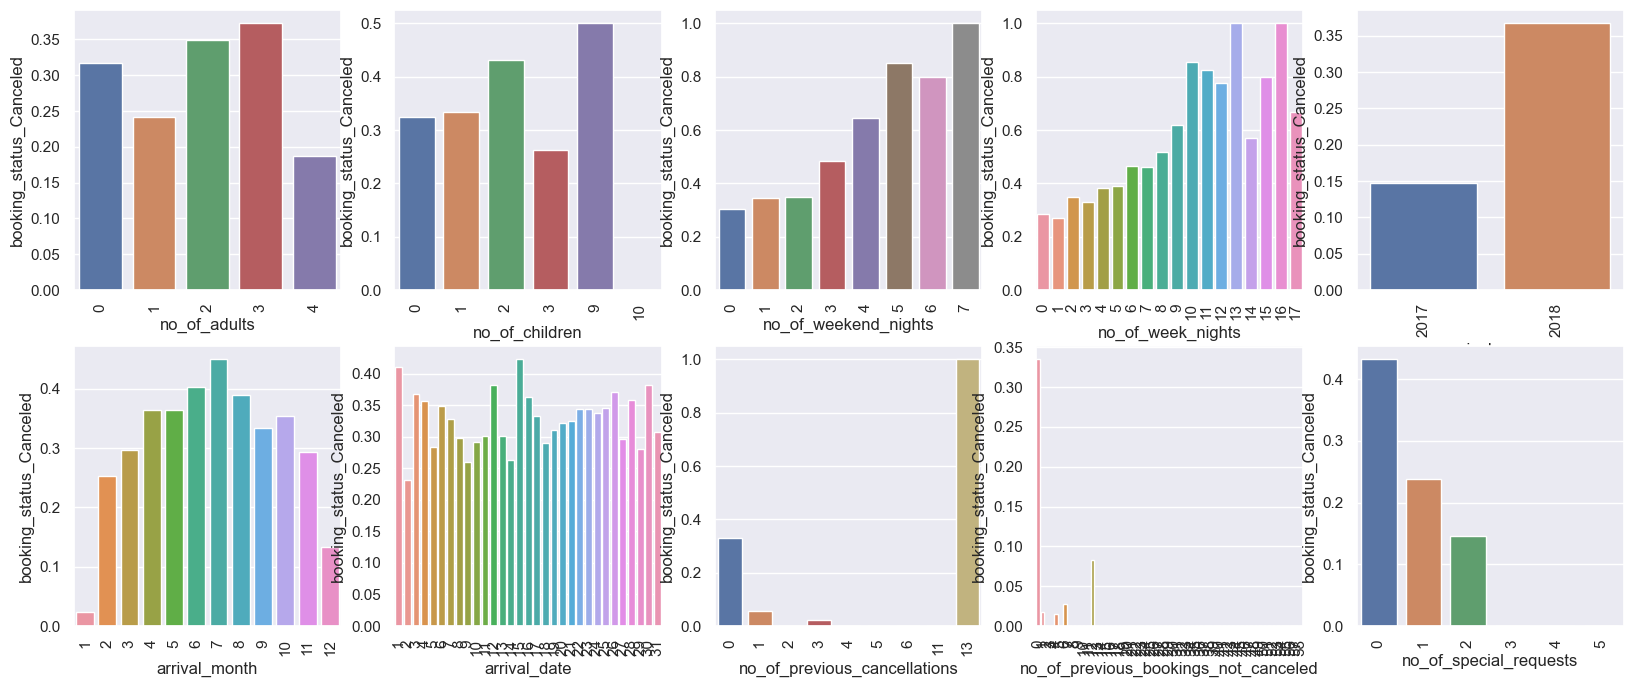

In [60]:
fig, ax = plt.subplots(2, len(discrete)//2, figsize=(20, 8), sharey=False)
ax = ax.flatten()

for i, feature_name in enumerate(discrete):
    temp_data = pd.get_dummies(data, columns=["booking_status"])
    canceled_average = temp_data.groupby([feature_name])["booking_status_Canceled"].mean().reset_index()

    chart = sns.barplot(data = canceled_average, x=feature_name, y="booking_status_Canceled", ax=ax[i])
    
    plt.setp(chart.get_xticklabels(), rotation = 90)


### Distributions des variables continues, séparées par booking_status

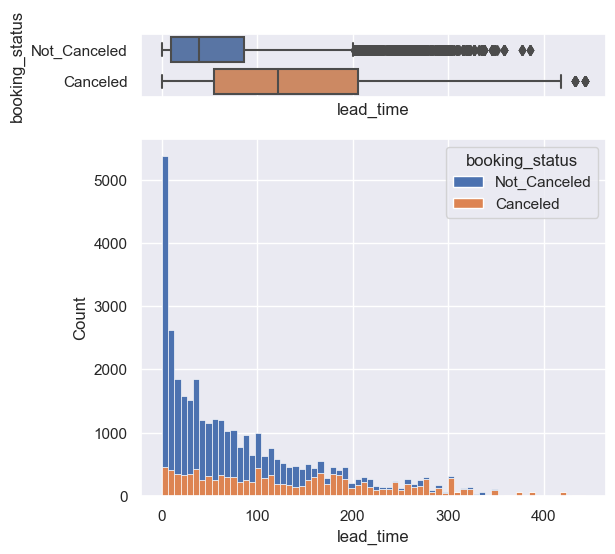

In [61]:

fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex='col', sharey='row', 
                                      figsize=(6, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})

temp_data = data.copy()
temp_data["booking_status"] = pd.Categorical(temp_data["booking_status"], ["Not_Canceled", "Canceled"])

sns.boxplot(data=temp_data, x='lead_time', y='booking_status', ax=ax_box, orient='h')

sns.histplot(data=temp_data, x='lead_time', ax=ax_hist, hue="booking_status", 
             multiple='stack', alpha=1.);

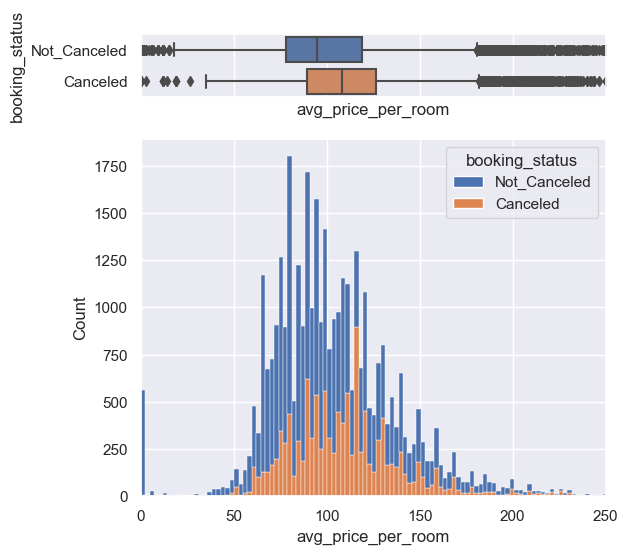

In [62]:
fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex='col', sharey='row', 
                                      figsize=(6, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})

ax_box.set_xlim((0, 250))

sns.boxplot(data=temp_data, x='avg_price_per_room', y='booking_status', ax=ax_box, 
            orient='h')

sns.histplot(data=temp_data, x='avg_price_per_room', ax=ax_hist, hue="booking_status", 
             multiple='stack', alpha=1.);

## Corrélations

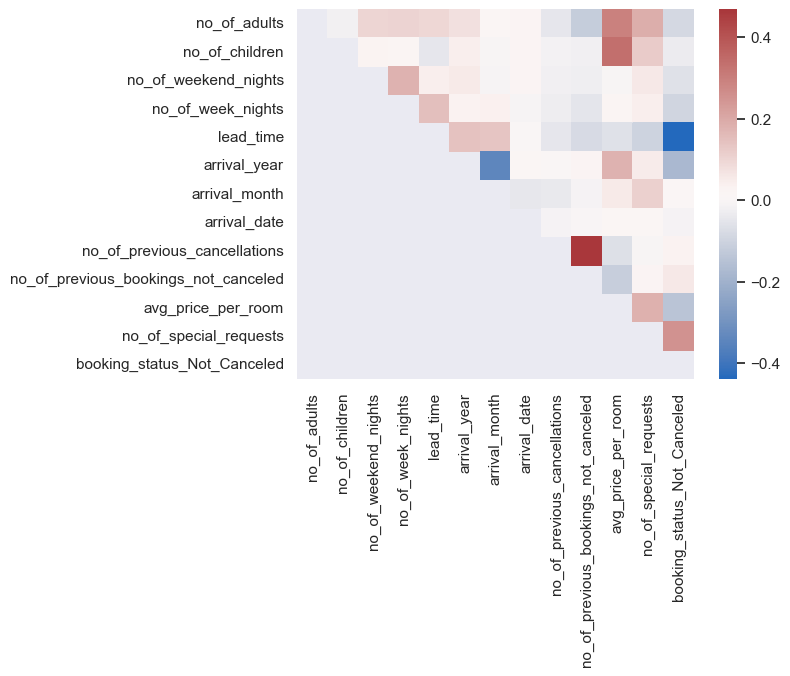

In [63]:
corr = pd.get_dummies(data, columns=["booking_status"], drop_first=True).corr()

sns.heatmap(data=corr, mask=np.tril(corr), cmap="vlag");

## Temporel

### Par jour

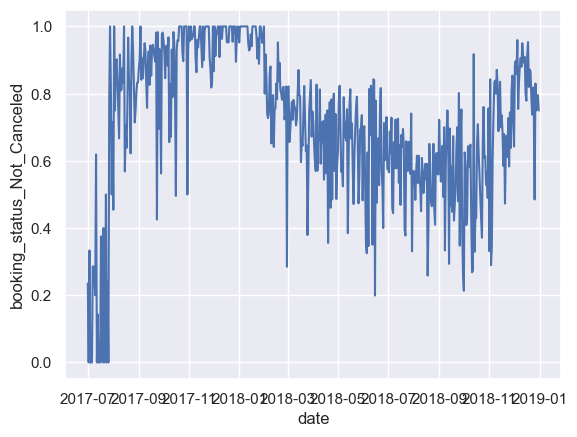

In [64]:
temp_data = data.rename(columns={"arrival_year": "year", "arrival_month": "month", "arrival_date": "day"})

temp_data["date"] = pd.to_datetime(temp_data[["year", "month", "day"]], errors="coerce")

temp_data = pd.get_dummies(temp_data, drop_first=True, columns=["booking_status"])
not_canceled_daily_average = temp_data.groupby(["date"])["booking_status_Not_Canceled"].mean().reset_index()

sns.lineplot(data=not_canceled_daily_average, x="date", y="booking_status_Not_Canceled");

On voit qu'il semble y avoir une périodicité. 

La saison d'été semble plus basse et celle d'hiver plus haute pour les réservations non annulées.

On choisis donc de garder le mois pour notre prédiction.

Attention cependant à ne pas inclure la variable année dans la prédiction. En effet si on regarde l'année 2017 elle ne comprend que la fin de l'année.

### Par mois

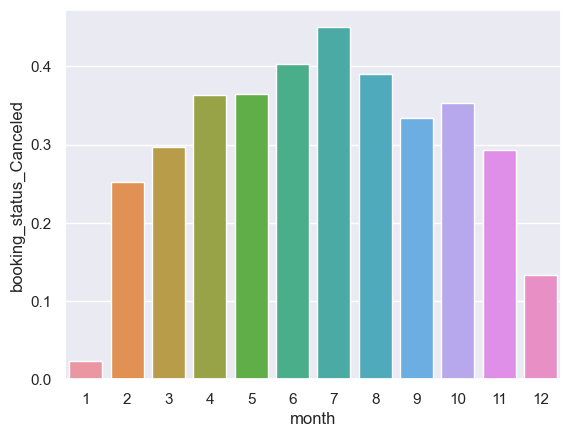

In [65]:
not_canceled_monthly_average = temp_data.groupby(["month"])["booking_status_Not_Canceled"].mean().reset_index()

not_canceled_monthly_average["booking_status_Canceled"] = \
    1 - not_canceled_monthly_average["booking_status_Not_Canceled"]

sns.barplot(not_canceled_monthly_average, x="month", y="booking_status_Canceled");

On voit que la proportion de réservations annulées est plus haute les mois d'été et bien plus basse les mois d'hiver

# Nettoyage des données

On supprime les informations de date sauf le mois qui peut être intéressant pour la saisonnalité

In [85]:
data_clean = data.drop(["arrival_year", "arrival_date"], axis=1)
data_clean = data_clean.rename({"arrival_month": "month"}, axis=1)

On garde les variables intéressantes (TODO: expliquer dans les sections en haut les choix)

In [86]:
data_clean.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'month', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [87]:
data_clean = data_clean[["lead_time", "no_of_special_requests", "no_of_week_nights", "no_of_adults", "month", "type_of_meal_plan", "market_segment_type"]]

In [88]:
continuous_clean = [c for c in continuous if c in data_clean.columns]
discrete_clean = [d for d in discrete if d in data_clean.columns]
categorical_clean = [c for c in categorical if c in data_clean.columns]

# Profil clients

## ACP

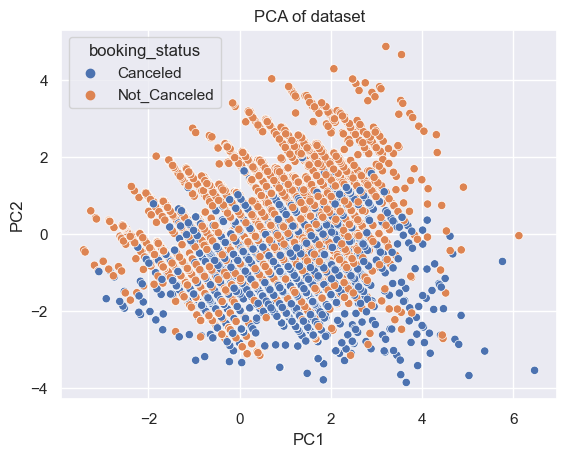

In [96]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = data_clean[continuous_clean + discrete_clean]

# Normalisation
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# ACP
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_normalized)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data["booking_status"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of dataset')
plt.show()

In [97]:
import plotly.offline
import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color= data["booking_status"],
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title='PCA of dataset'
)
fig.show()

#plotly.offline.plot(fig)

'temp-plot.html'

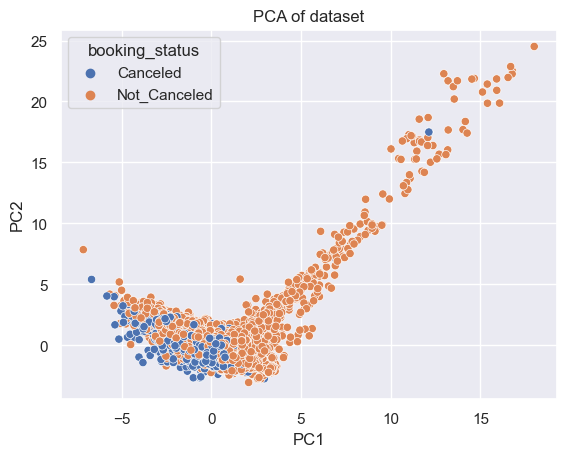

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = data[continuous + discrete]

# Normalisation
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# ACP
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_normalized)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data["booking_status"])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of dataset')
plt.show()

In [95]:
import plotly.offline
import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color= data["booking_status"],
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title='PCA of dataset'
)
fig.show()

#plotly.offline.plot(fig)

'temp-plot.html'